### Bu projede, çalışan memnuniyeti ve performans verilerini kullanarak çalışanların işten ayrılma olasılığını tahmin edeceğiz. Bu amaca ulaşmak için çeşitli veri analizi, görselleştirme teknikleri ve makine öğrenimi modelleri kullanacağız.



# GEREKLİ KÜTÜPHANELERİ EKLİYORUZ

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') # Hata mesajlarını gizlemek için kullanıyoruz.

### Veri Yükleme ve İlk İnceleme
### Veri setini df değişkenine yükleyip, kopyasını oluşturuyoruz. Daha sonra ilk beş satırı inceleyerek verinin genel yapısını anlıyoruz:



In [5]:
hr_df = pd.read_csv('HR_capstone_dataset.csv')
df = hr_df.copy()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


info komutu ile verisetini inceliyoruz buradan kategorik verilr ile numerik değerleri görebiliriz.

### Veri Seti İncelemesi


Veri setinin genel yapısını anlamak için info komutunu kullanıyoruz. Bu sayede veri türlerini ve eksik değerleri görebiliriz.




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2 adet kategorik değer bulunuyor ve hiç null değerimiz bulunmuyor.

Numerik sütunların tanımlayıcı istatistiklerini inceleyelim:



In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.describe(include='object')

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


Eksik değerleri kontrol edelim:



In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Veri setinde eksik değer bulunmamaktadır.

Yinelenen satırları kontrol edelim ve gerekirse silelim:

In [10]:
df.duplicated().sum()

3008

In [11]:
df.drop_duplicates(inplace=True)

Yinelenen satırları kaldırdıktan sonra veri setimizin boyutları şu şekildedir:



In [12]:
df.shape

(11991, 10)

# Veri Görselleştirme
## Kategorik Değişkenlerin Dağılımı
### Kategorik değişkenlerin dağılımını inceleyelim:

In [13]:
for col in df.columns:
  if df[col].dtype == 'object':
      px.histogram(df, x=col).show()

## Numerik Değişkenlerin Kutu Grafikleri (Box Plot)


In [14]:
for col in df.columns:
  if df[col].dtype != 'object':
    px.box(df[col]).show()


## Numerik Değişkenlerin Histogramları

In [15]:
for col in df.columns:
  if df[col].dtype != 'object':
    px.histogram(df, x=col,title=f'{col} Histogram').show()

## Alan Grafiği
### Satisfaction level ve average montly hours arasındaki ilişkiyi gösteren alan grafiği:



In [16]:
px.area(df, x='satisfaction_level', y='average_montly_hours', color='left')

### Kategorik Değişkenlerin Etiketlenmesi (Label Encoding)


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


## Korelasyon Matrisi
### Değişkenler arasındaki korelasyonları incelemek için bir korelasyon matrisi oluşturuyoruz.



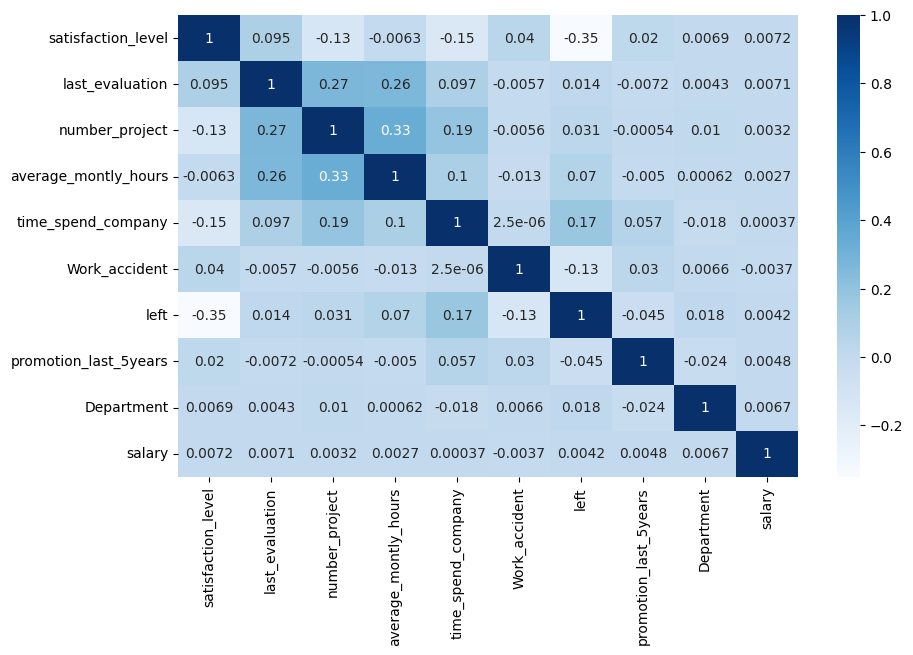

In [18]:
# df.corr().style.background_gradient()

corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

In [19]:
df.corr()['left'].sort_values(ascending=False,key=abs)

left                     1.000000
satisfaction_level      -0.350558
time_spend_company       0.173295
Work_accident           -0.125436
average_montly_hours     0.070409
promotion_last_5years   -0.044657
number_project           0.030928
Department               0.018286
last_evaluation          0.013520
salary                   0.004224
Name: left, dtype: float64

# Makine Öğrenimi Modeli
### Veriyi Eğitim ve Test Setlerine Ayırma

In [20]:
from sklearn.model_selection import train_test_split

X= df.drop('left', axis=1)
y= df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=43)

In [21]:
pip install lazypredict

In [22]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:35<00:00,  1.85it/s]

[LightGBM] [Info] Number of positive: 1683, number of negative: 8509
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 10192, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.165130 -> initscore=-1.620547
[LightGBM] [Info] Start training from score -1.620547


100%|██████████| 29/29 [00:36<00:00,  1.24s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.99,0.97,0.97,0.99,0.33
RandomForestClassifier,0.99,0.96,0.96,0.99,1.83
XGBClassifier,0.98,0.96,0.96,0.98,0.56
BaggingClassifier,0.98,0.96,0.96,0.98,0.21
ExtraTreesClassifier,0.98,0.95,0.95,0.98,1.87
DecisionTreeClassifier,0.97,0.95,0.95,0.97,0.07
SVC,0.97,0.94,0.94,0.97,1.51
LabelPropagation,0.96,0.94,0.94,0.96,7.45
LabelSpreading,0.96,0.94,0.94,0.96,14.09


In [23]:
models_sort=models.sort_values(by="Accuracy",ascending=True)
fig=px.bar(models_sort, x='Accuracy', y=models_sort.index, orientation='h', title='Model Accuracy Comparison',color='Accuracy', color_continuous_scale='Oryel',height=950)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [24]:
px.bar(models_sort, x='Time Taken', y=models_sort.index, orientation='h', title='Model Time Taken Comparison',color='Time Taken',color_continuous_scale='Oryel',height=950)

In [25]:
px.bar(models_sort, x='F1 Score', y=models_sort.index, orientation='h', title='Model F1 Score Comparison',color='F1 Score',color_continuous_scale='Oryel',height=950)
#

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1491
           1       0.99      0.93      0.96       308

    accuracy                           0.99      1799
   macro avg       0.99      0.96      0.98      1799
weighted avg       0.99      0.99      0.99      1799


Cross-Validation Scores: [0.98832847 0.98206839 0.9854045  0.98415346 0.98165138]

 Ortalama :  0.9843212403277567 
 Standart Sapma :  0.002427468169649096 
 



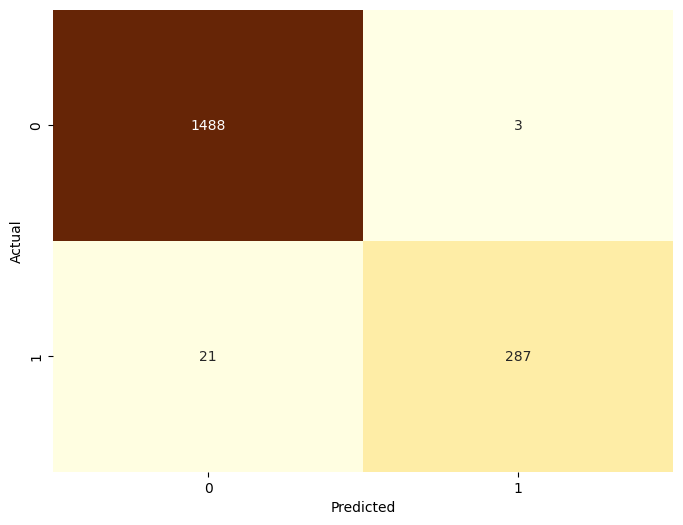

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
cv = cross_val_score(rf_clf, X, y, cv=5)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlOrBr", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print('\nCross-Validation Scores:',cv)
print('\n','Ortalama : ',cv.mean(),'\n','Standart Sapma : ',cv.std(),'\n \n')


[LightGBM] [Info] Number of positive: 1683, number of negative: 8509
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 10192, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.165130 -> initscore=-1.620547
[LightGBM] [Info] Start training from score -1.620547
En İyi Parametreler: {'subsample': 0.6616161616161617, 'num_leaves': 50, 'n_estimators': 1600, 'min_child_samples': 9, 'max_depth': 70, 'learning_rate': 0.01873817422860384, 'colsample_bytree': 0.696969696969697}
Karmaşıklık Matrisi:

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1491
           1       0.98      0.94      0.96       308

    accuracy                           0.98      1799
   macro avg       0.98      0.97  

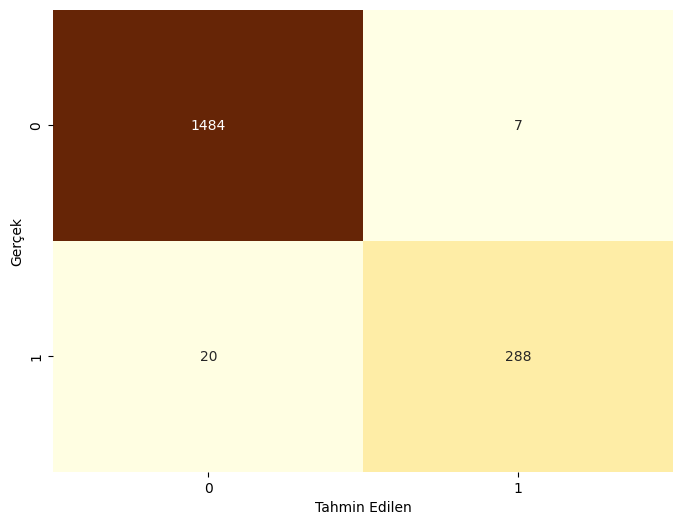

In [25]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV



param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=2000, num=20)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'learning_rate': np.logspace(-3, 0, 100),
    'num_leaves': [int(x) for x in np.linspace(20, 50, num=10)],
    'min_child_samples': [int(x) for x in np.linspace(2, 25, num=10)],
    'subsample': np.linspace(0.5, 1.0, 100),
    'colsample_bytree': np.linspace(0.5, 1.0, 100)
}

lgb_model = lgb.LGBMClassifier()

lgb_random = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist,
                                 n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
lgb_random.fit(X_train, y_train)

print(f"En İyi Parametreler: {lgb_random.best_params_}")

best_lgb = lgb_random.best_estimator_
y_pred = best_lgb.predict(X_test)

print("Karmaşıklık Matrisi:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlOrBr", cbar=False)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(best_lgb, X, y, cv=5)
print('\nÇapraz Doğrulama Skorları:', cv_scores)
print('\nOrtalama:', cv_scores.mean())
print('\nStandart Sapma:', cv_scores.std())


Fitting 3 folds for each of 100 candidates, totalling 300 fits
En İyi Parametreler: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}
Karmaşıklık Matrisi:


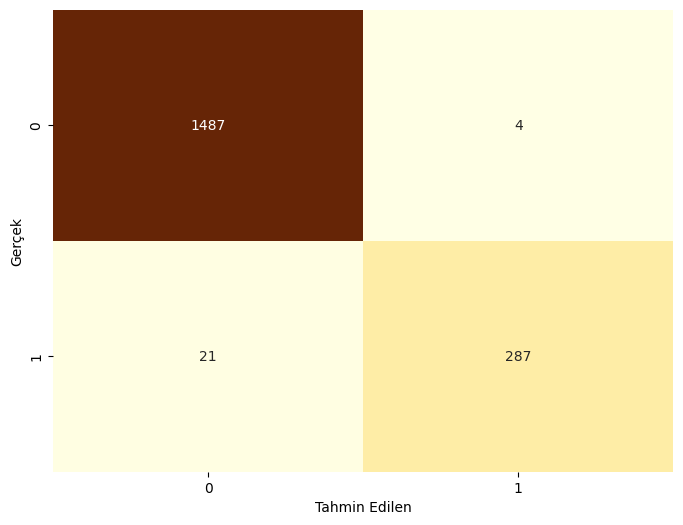


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1491
           1       0.99      0.93      0.96       308

    accuracy                           0.99      1799
   macro avg       0.99      0.96      0.97      1799
weighted avg       0.99      0.99      0.99      1799


Çapraz Doğrulama Skorları: [0.98832847 0.98206839 0.98665555 0.98415346 0.98165138]

Ortalama: 0.9845714488348459

Standart Sapma: 0.00258555648780521


In [27]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=2000, num=20)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


rf_model = RandomForestClassifier(random_state=42)


rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)


print(f"En İyi Parametreler: {rf_random.best_params_}")


best_rf = rf_random.best_estimator_


y_pred = best_rf.predict(X_test)


print("Karmaşıklık Matrisi:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlOrBr", cbar=False)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()


print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


cv_scores = cross_val_score(best_rf, X, y, cv=5)
print('\nÇapraz Doğrulama Skorları:', cv_scores)
print('\nOrtalama:', cv_scores.mean())
print('\nStandart Sapma:', cv_scores.std())

